This a notebook to start to play with the following steps:
    * DATASET
    * EXPLORATORY DATA ANALYSIS
    * DATA WRANGLING
    * ALGORITHMS

# DATASET

First of all, I import the required libraries to develop our study along this notebook

In [45]:
import os
import numpy as np
import pandas as pd
pd.set_option('max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

In [46]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [47]:
pwd

'/home/miguel/my_project_python/my_project_env/tfm/datasets/test/all'

In [48]:
path = "/home/miguel/my_project_python/my_project_env/tfm/datasets/test/all"
os.chdir(path)
    
df = pd.read_csv("data_no_rolling.csv")

In [49]:
df.head()

,Unnamed: 0,CatN1_baño,CatN1_cocina_y_comedor,CatN1_decoración_de_navidad,CatN1_decoración_para_tu_casa,CatN1_jardín_y_terraza,CatN1_lámparas_e_iluminación,CatN1_muebles,CatN1_organización_y_almacenamiento,CatN1_playa_y_camping,CatN1_textil_hogar,CatN2_alfombras_de_bambú,CatN2_armarios_de_baño,CatN2_banquetas_y_bancos,CatN2_belenes_y_portales_de_navidad,CatN2_biombos_separadores,CatN2_carritos_verduleros_y_de_cocina,CatN2_cenadores_y_gazebos_plegables,"CatN2_consolas,_recibidores_y_tocadores",CatN2_cómodas,CatN2_espejos_de_pared,CatN2_espejos_de_pie_y_vestidores,CatN2_estanterías_para_baño,CatN2_estanterías_y_librerías,"CatN2_faroles,_portavelas_y_candelabros",CatN2_lámparas_de_mesa,CatN2_lámparas_de_mesita_de_noche,CatN2_mesas_de_centro_y_auxiliares,CatN2_mesitas_de_noche,CatN2_percheros,CatN2_sillas,CatN2_sillas_y_sillones_de_jardín_y_terraza,Cat_Price,Page_Views,Impressions,Clics,CPC_medio,Conversions,Ads_Income,Units_Sold,Net_Incomes,ROAS
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df.shape

(9280, 42)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 42 columns):
Unnamed: 0                                     9280 non-null int64
CatN1_baño                                     9280 non-null int64
CatN1_cocina_y_comedor                         9280 non-null int64
CatN1_decoración_de_navidad                    9280 non-null int64
CatN1_decoración_para_tu_casa                  9280 non-null int64
CatN1_jardín_y_terraza                         9280 non-null int64
CatN1_lámparas_e_iluminación                   9280 non-null int64
CatN1_muebles                                  9280 non-null int64
CatN1_organización_y_almacenamiento            9280 non-null int64
CatN1_playa_y_camping                          9280 non-null int64
CatN1_textil_hogar                             9280 non-null int64
CatN2_alfombras_de_bambú                       9280 non-null int64
CatN2_armarios_de_baño                         9280 non-null int64
CatN2_banquetas_y_banc

I drop the first columns because it is unnecessary

In [52]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

I remove rows with Impressions

In [53]:
df = df[~df["Impressions"].isin([0, 1])]

In [54]:
df.shape

(6427, 41)

### Settings and switches

Here one can choose settings for optimal performance and runtime.
For example, nr_cv sets the number of cross validations used in GridsearchCV, and
min_val_corr is the minimum value for the correlation coefficient to the target (only features with larger correlation will be used).

In [55]:
# setting the number of cross validations used in the Model part 
nr_cv = 5

# switch for using log values for SalePrice and features     
use_logvals = 1    
# target used for correlation 
target = 'SalePrice_Log'
    
# only columns with correlation above this threshold value  
# are used for the ML Regressors in Part 3
min_val_corr = 0.4    
    
# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1

### Some useful functions

In [56]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [57]:
def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])

In [58]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

# EXPLORATORY DATA ANALYSIS

### Describe Numerical Data

In [59]:
df.describe()

,CatN1_baño,CatN1_cocina_y_comedor,CatN1_decoración_de_navidad,CatN1_decoración_para_tu_casa,CatN1_jardín_y_terraza,CatN1_lámparas_e_iluminación,CatN1_muebles,CatN1_organización_y_almacenamiento,CatN1_playa_y_camping,CatN1_textil_hogar,CatN2_alfombras_de_bambú,CatN2_armarios_de_baño,CatN2_banquetas_y_bancos,CatN2_belenes_y_portales_de_navidad,CatN2_biombos_separadores,CatN2_carritos_verduleros_y_de_cocina,CatN2_cenadores_y_gazebos_plegables,"CatN2_consolas,_recibidores_y_tocadores",CatN2_cómodas,CatN2_espejos_de_pared,CatN2_espejos_de_pie_y_vestidores,CatN2_estanterías_para_baño,CatN2_estanterías_y_librerías,"CatN2_faroles,_portavelas_y_candelabros",CatN2_lámparas_de_mesa,CatN2_lámparas_de_mesita_de_noche,CatN2_mesas_de_centro_y_auxiliares,CatN2_mesitas_de_noche,CatN2_percheros,CatN2_sillas,CatN2_sillas_y_sillones_de_jardín_y_terraza,Cat_Price,Page_Views,Impressions,Clics,CPC_medio,Conversions,Ads_Income,Units_Sold,Net_Incomes,ROAS
count,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.000000,6427.00000,6427.000000
mean,0.033297,0.009647,0.027073,0.155594,0.046834,0.082776,0.462269,0.093356,0.006068,0.083087,0.083087,0.020850,0.031585,0.027073,0.017271,0.009647,0.006068,0.177688,0.028162,0.077797,0.054302,0.012447,0.024273,0.006224,0.030808,0.051968,0.058814,0.124630,0.093356,0.017115,0.046834,95.423993,19.943986,1303.520927,12.959546,0.253305,0.079014,5.945318,0.258597,13.17256,10.569213
std,0.179425,0.097751,0.162310,0.362498,0.211299,0.275564,0.498613,0.290954,0.077668,0.276035,0.276035,0.142892,0.174907,0.162310,0.130289,0.097751,0.077668,0.382280,0.165450,0.267872,0.226631,0.110880,0.153906,0.078651,0.172809,0.221980,0.235295,0.330325,0.290954,0.129711,0.211299,74.508995,27.273955,1647.124935,18.322166,0.147255,0.305165,28.568977,0.722048,41.47462,69.446128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,332.000000,2.000000,0.180000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,9.000000,740.000000,6.000000,0.250000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,28.000000,1606.000000,16.000000,0.330000,0.000000,0.000000,0.000000,0.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300.000000

### Distribution of Grades

In [60]:
y = df["ROAS"]

In [61]:
y.describe()

count    6427.000000
mean       10.569213
std        69.446128
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2514.000000
Name: ROAS, dtype: float64

In [62]:
y.value_counts()

0.000000      5419
12.368421        3
31.037736        2
20.434783        2
15.875000        2
102.812500       2
4.866864         2
4.544199         2
14.781362        2
10.477707        2
164.500000       2
7.908654         2
4.140940         2
7.759434         2
15.373832        2
4.487273         2
31.333333        2
7.365672         2
123.500000       2
5.323625         2
24.191176        2
22.026786        2
58.750000        2
25.503876        2
15.518868        2
37.961538        2
5.981818         2
28.362069        2
9.909639         2
548.333333       2
              ... 
49.156069        1
24.884758        1
2.739592         1
4.377405         1
44.450000        1
103.100000       1
5.141962         1
137.481481       1
43.355932        1
108.370861       1
4.034868         1
55.849829        1
3.212014         1
39.679443        1
7.483316         1
6.589977         1
20.395604        1
5.806753         1
5.401316         1
38.933333        1
10.753414        1
3.717791    

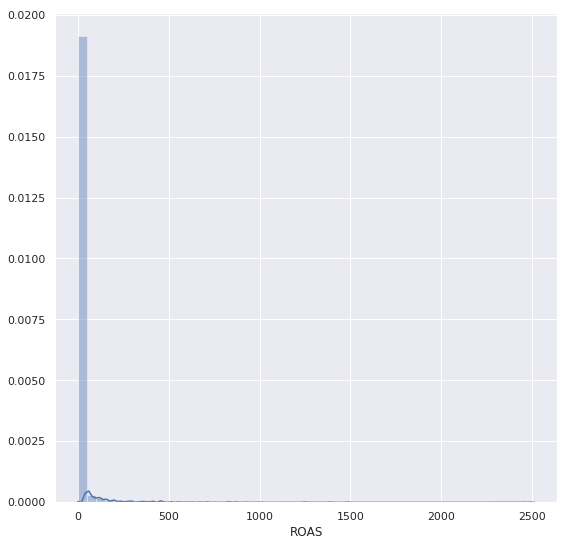

In [64]:
sns.distplot(y);

In [42]:
y_log = np.log(y)

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


------

NO PODEMOS HACER LOGARITMOS PARA Y PORQUE TENEMOS MUCHOS VALORES CON 0

-----